# Inference of Income Level 

# Proposal

Group: 19

Name: Jason Shi, Siying Liu, Shaoxi Guan, Guozheng Gong

## Introduction 

People often devote most of their time to their jobs, but the question then arises, is there any relationship between people's income and the number of hours they work? The relationship between education level and income level is widely concerned. The findings of previous research show that “The results pointed to education and hours worked are the most important factors in explaining income variations ' (P. de Wolff, A.R.D. van Slijpe, 1973). As a result, we raise our question: what can affect the income level? In this report, we will investigate the income level by concentrating on the education level and work hours per week. We use the hours-per-week and education level in the dataset as our random variable of interest and use two categories of yearly income provided by the dataset which are $>50$K and $<=50$K. For education level, we will be separating by whether or not a person has post-secondary education. The mean of hours-per-week and the proportion of people with high income having higher education level are the location parameters we are going to discuss. Our two hypothesis questions are: 

1. Is the mean of work hours per week for income $>50$K people higher than that of people with income <= 50k?

2. Do more than 50% of people with income $>50$K have post-secondary education?

## Preliminary Data Analysis

In [1]:
# Load packages
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Unzip and read data
temp <- tempfile()
download.file("https://archive.ics.uci.edu/static/public/2/adult.zip", temp)
work_data <- read_csv(unz(temp, "adult.data"), col_names = FALSE)
unlink(temp)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(work_data)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Adding column names.

In [4]:
names <- c("age","workclass","Identification","education",
           "education-num","marital-status","occupation","relationship",
           "race","sex","capital-gain",
           "capital-loss","hours_per_week","native-country",
          "income")
colnames(work_data) <- names
head(work_data)

age,workclass,Identification,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native-country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Let's first look at relationship between income and hours worked per week.

In [5]:
#Selecting columns of interest
work_data_income_hours <- work_data |>
select(income, hours_per_week)

head(work_data_income_hours)

income,hours_per_week
<chr>,<dbl>
<=50K,40
<=50K,13
<=50K,40
<=50K,40
<=50K,40
<=50K,40


Visualize hours worked based on income with boxplot. 

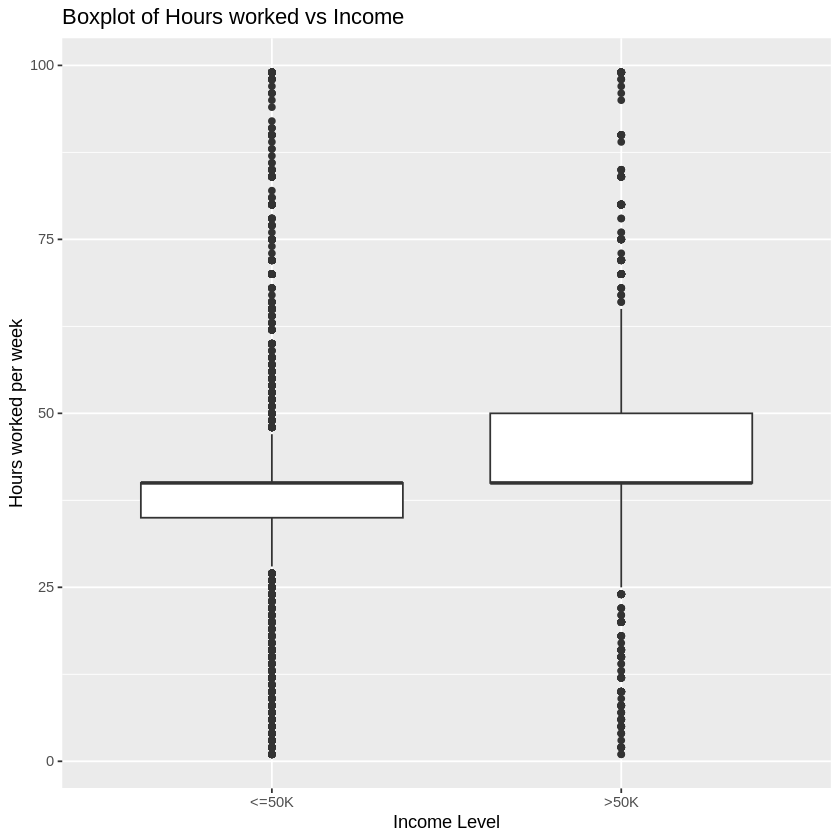

In [6]:
work_boxplot <- work_data_income_hours |>
ggplot(aes(x=income, y = hours_per_week)) + 
geom_boxplot() + 
labs(x = "Income Level", y = "Hours worked per week", title = "Boxplot of Hours worked vs Income")

work_boxplot

We see most income $>50$K people work more hours than income $<=50$K people.

Compute the estimates of parameter (mean of hours worked per week based on their income levels)

In [7]:
work_data_income_hours_summary <- work_data_income_hours |>
group_by(income) |>
summarize(mean = mean(hours_per_week))

In [8]:
work_data_income_hours_summary

income,mean
<chr>,<dbl>
<=50K,38.84021
>50K,45.47303


Our statistics show mean of hours worked per week for income $>50$K people is greater than that of income $<=50$K people. 

Now let's look at the relationship between income and education. First, we need to refactor the `education` column. The value `1` corresponds to no post-secondary education and value `2` corresponds to post-secondary education. 

In [9]:
work_data_income_edu <- work_data |>
select(income, education) |>

mutate(education_level = ifelse(education %in% c("Bachelors",
                                               "Some-college", 
                                               "Masters", 
                                               "Doctorate"),
                                "2", "1")) |>
select(-education)
head(work_data_income_edu)

income,education_level
<chr>,<chr>
<=50K,2
<=50K,2
<=50K,1
<=50K,1
<=50K,2
<=50K,2


Let's visualize the relationship with a bar graph.

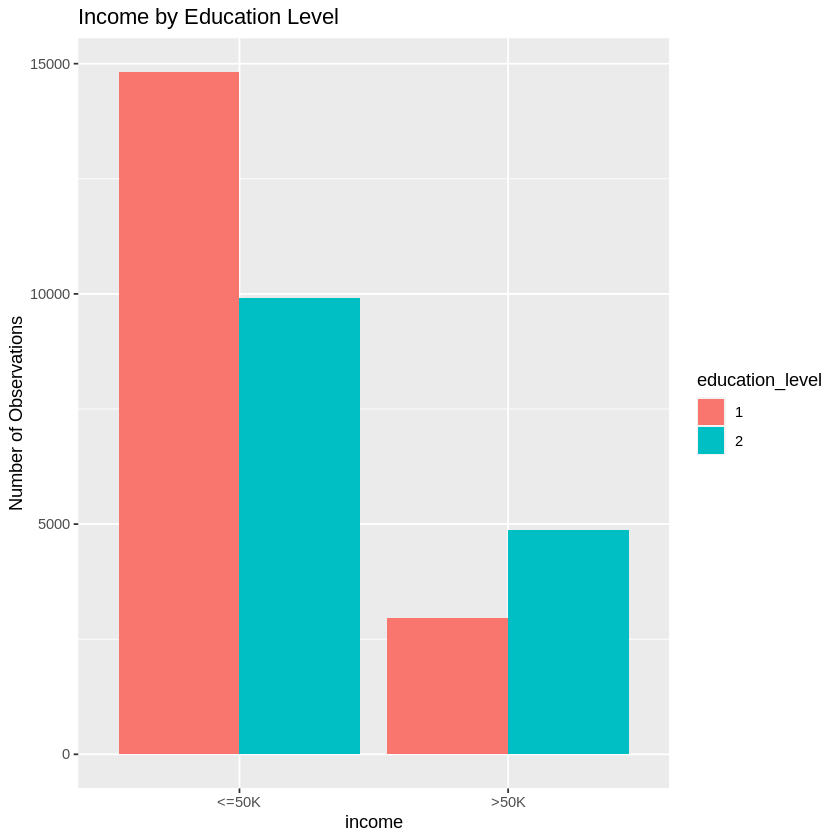

In [10]:
bar_work_data_income_edu <- work_data_income_edu |> 
ggplot(aes(income, after_stat(count))) + 
geom_bar(aes(fill = education_level), position = "dodge") +
labs(y = "Number of Observations", title = "Income by Education Level")

bar_work_data_income_edu

Most income $<=50$K people have education level `1`. Most income $>50$K people have education level `2`.

Creating a contigency table,

In [11]:
work_data_edu_income_table <-work_data_income_edu |>
group_by(income) |>
summarize(education_level_1 = sum(education_level == 1),
          education_level_2 = sum(education_level == 2),
          Total = n())

work_data_edu_income_table

income,education_level_1,education_level_2,Total
<chr>,<int>,<int>,<int>
<=50K,14811,9909,24720
>50K,2968,4873,7841


and calculating for summary statistics about proportions.

In [12]:
work_data_edu_income_summary <- work_data_edu_income_table |>
group_by(income) |>
summarize(prop_edu_lvl_1 = education_level_1/Total,
          prop_edu_lvl_2 = education_level_2/Total)
work_data_edu_income_summary

income,prop_edu_lvl_1,prop_edu_lvl_2
<chr>,<dbl>,<dbl>
<=50K,0.5991505,0.4008495
>50K,0.3785231,0.6214769


## Methods: Plan

We used INCOME LEVEL and HOURS WORKED PER WEEK, to examine work hour. We use proportion of post-secondary education for income > 50k to examine education. Then, we will do hypothesis test and calculate confidence interval. 


To figure out whether mean of work hours per week for income >50k people is higher than that of income <= 50k people , we will use hypothesis test:
$$H_0: \mu_{\text{<=50k}} - \mu_{\text{> 50k}} = 0$$ 
$$H_1: \mu_{\text{<=50k}} - \mu_{\text{> 50k}} < 0$$ 
$$CI\left(\mu_1 - \mu_2\right) = \left(\bar{X}_1-\bar{X}_2\right) \pm z^*\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}$$
where $z^*$ is the quantile of a standard Normal.


To figure out whether over half of >50k income poeple have post-secondary education, we will use hypothesis test:
$$H_0: p_{\text{post-secondary education}} = 0.5$$ 
$$H_1: p_{\text{post-secondary education}} > 0.5$$. 
$$CI\left(p\right) = \hat{p} \pm z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$
where $z^*$ is the quantile of a standard Normal.


We will get these by using bootstrapping and CLT and compare their results to make our report trustworthy.


Although we have some plots and some tables of sample mean and proportion, these are not enough, because we haven’t calculated confidence interval, so we don’t know how much confidence we have for this hypothesis. Therefore, we still can’t answer our question.


In the future, if both of our hypothesis is true, our result might encourage people to work harder and study better to earn more money.  


## References

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

Bick, Alexander, Nicola Fuchs-Schündeln, and David Lagakos. 2018. "How Do Hours Worked Vary with Income? Cross-Country Evidence and Implications." American Economic Review, 108 (1): 170-99.  DOI: 10.1257/aer.20151720

P. de Wolff, A.R.D. van Slijpe,The relation between income, intelligence, education and social background, European Economic Review, Volume 4, Issue 3, 1973, Pages 235-264, ISSN 0014-2921, https://doi.org/10.1016/0014-2921(73)90014-7 